<a href="https://colab.research.google.com/github/koitran14/Heart-Failure-Prediction/blob/main/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis (EDA)** (DANG KHOI - ITCSIU21197)


## **Library & data import**

In [ ]:
# To handle the data
import pandas as pd
import numpy as np

# Visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# preprocess the data
from sklearn.preprocessing import RobustScaler

# Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout
from keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

In [ ]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


**About the data (Description of attributes)**

* age: Age of the patient

* anaemia: Decrease of red blood cells or hemoglobin (Boolean)

* creatinine_phosphokinase: Level of the CPK enzyme in the blood (mcg/L)

* diabetes: If the patient has diabetes (Boolean)

* ejection_fraction: Percentage of blood leaving the heart at each contraction

* high_blood_pressure: If the patient has hypertension (Boolean)

* platelets: Platelets in the blood (kiloplatelets/mL)

* serum_creatinine: Level of serum creatinine in the blood (mg/dL)

* serum_sodium: Level of serum sodium in the blood (mEq/L)

* sex: Woman = 0, Man = 1

* smoking: If the patient smokes or not (Boolean)

* time: Follow-up period (days)

* DEATH_EVENT: If the patient deceased during the follow-up period (Boolean)





*Attributes having Boolean values: 0 = Negative (No); 1 = Positive (Yes)*

## **Explore the Dataset**

In [ ]:
df.shape
print("The dataset has {} rows and {} columns".format(df.shape[0],df.shape[1]))

The dataset has 299 rows and 13 columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [ ]:
df[df.duplicated()]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


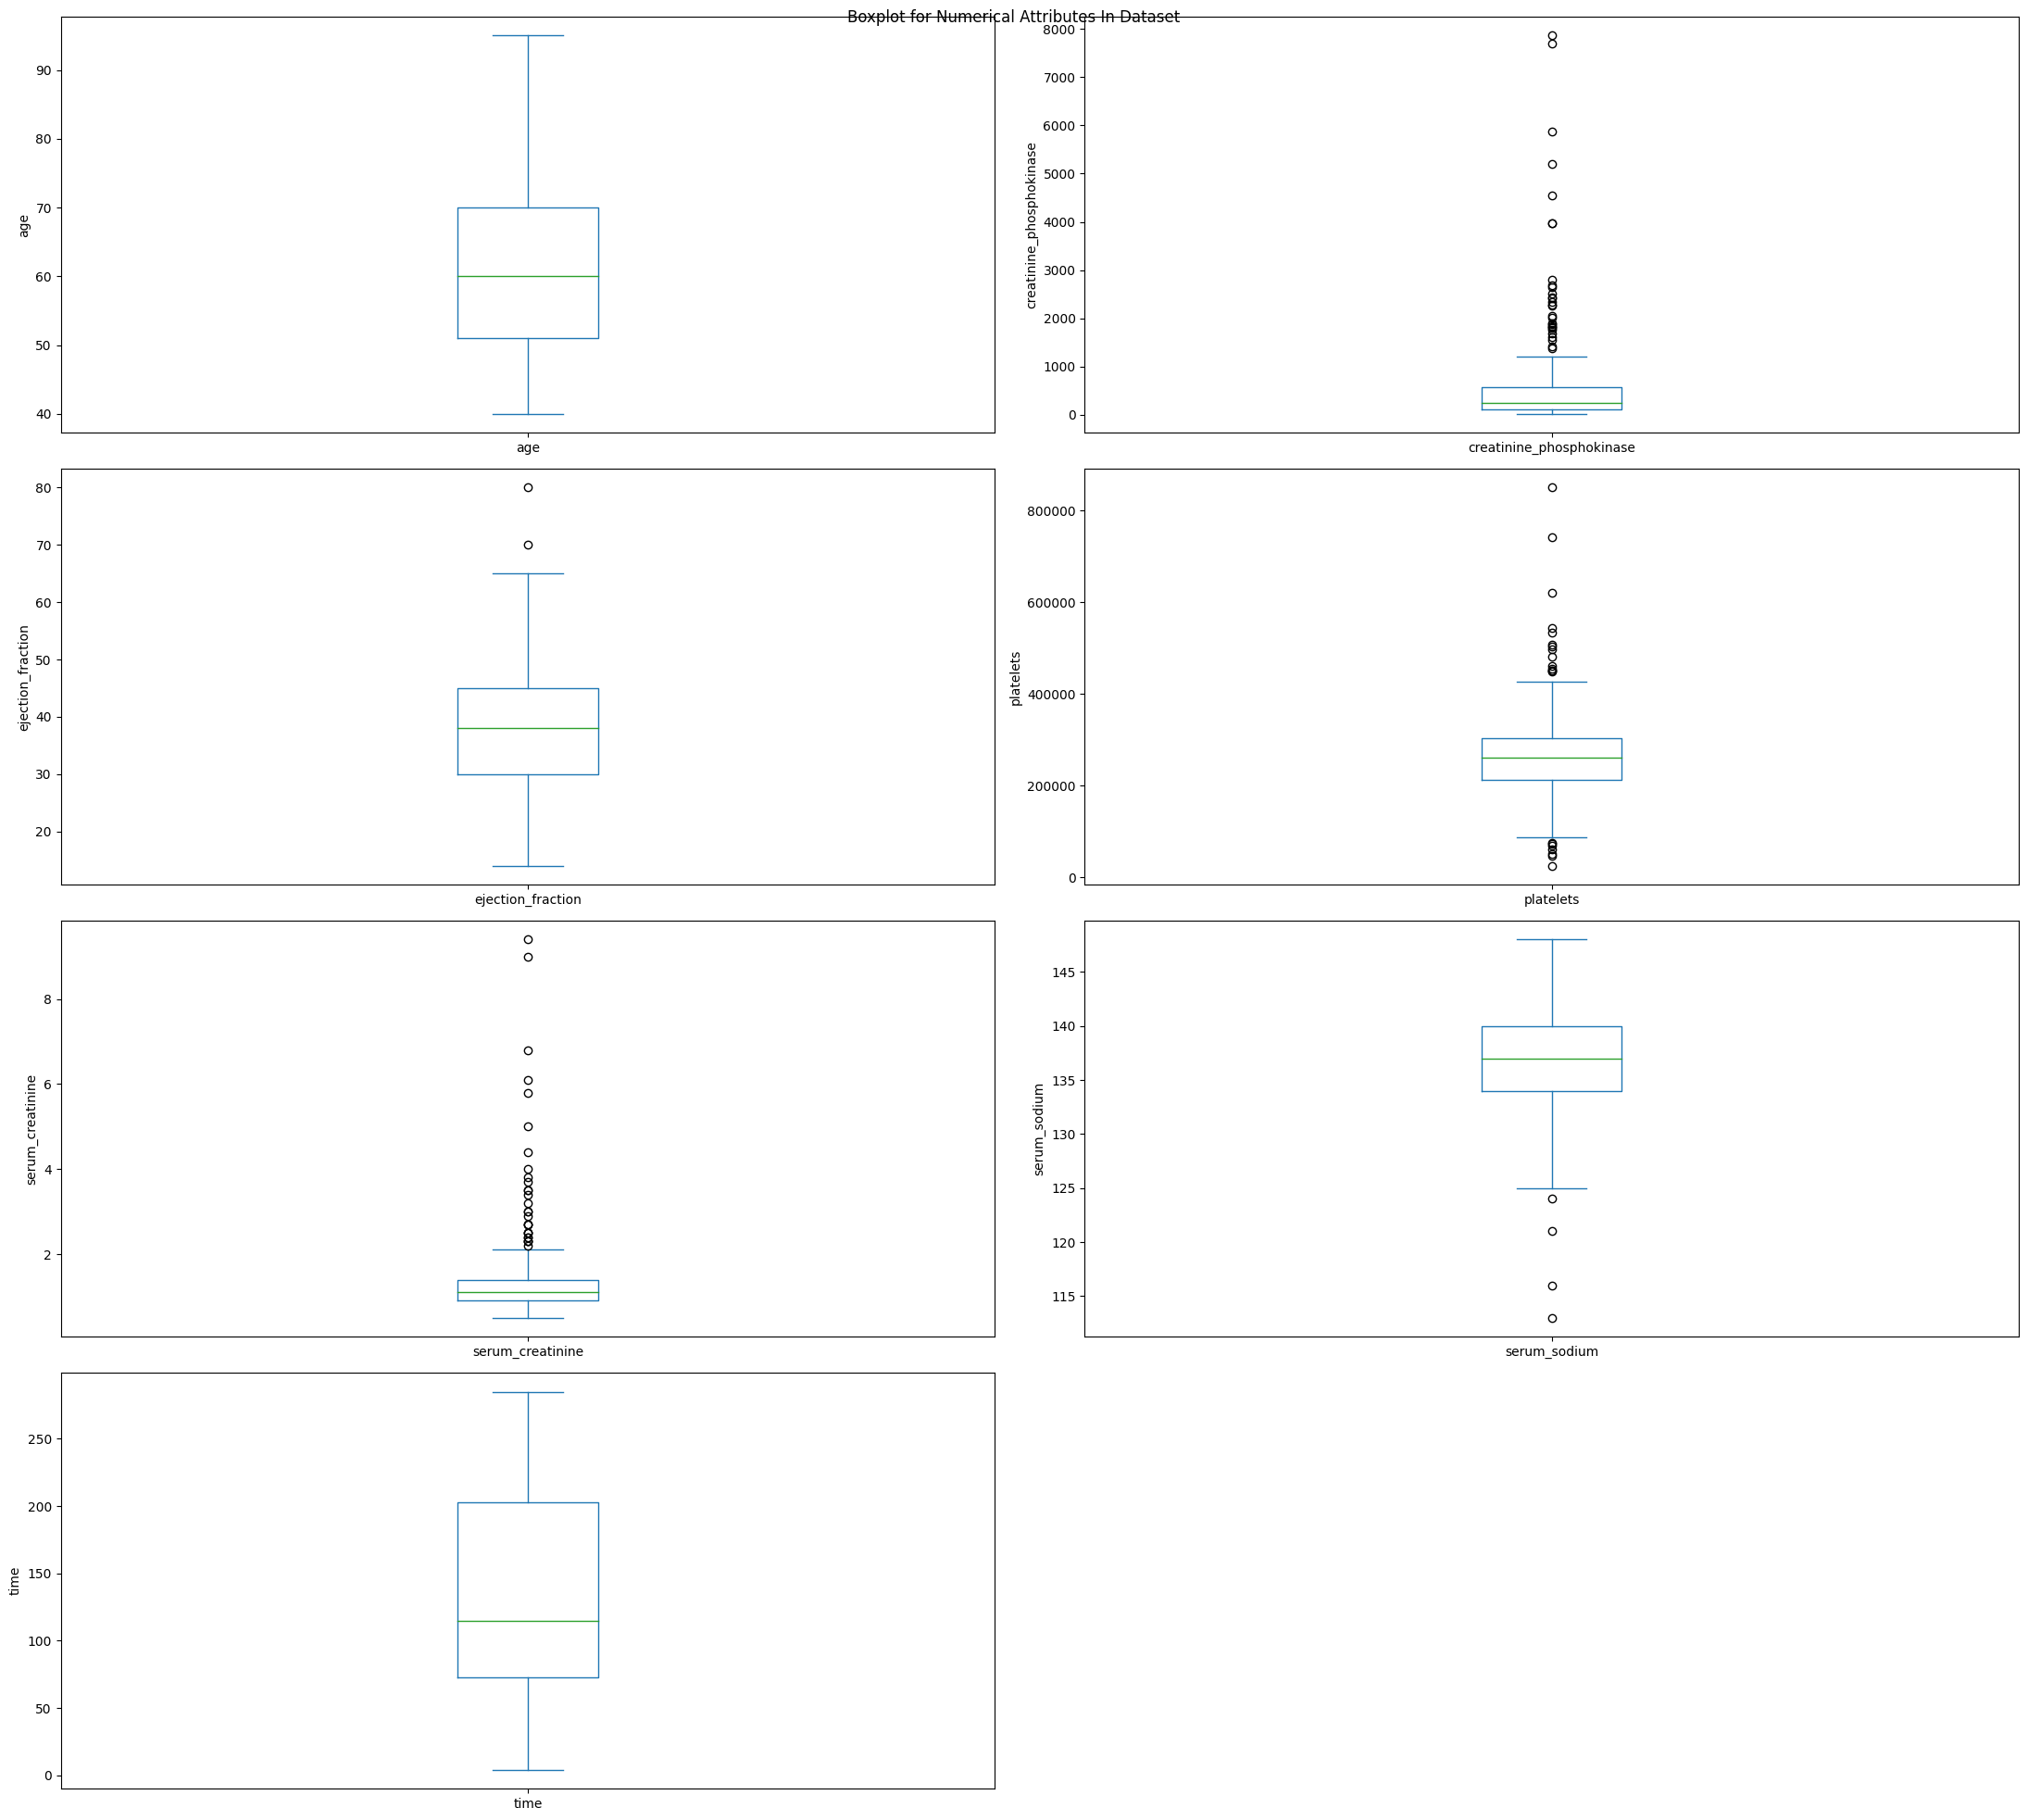

In [ ]:
# Specify the column names of the attributes you want to include
specific_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

# Create subplots for specific columns
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(22, 20))

# Flatten the axes array for easier indexing
axes = axes.flatten()

for i, col in enumerate(specific_cols):
    df[col].plot(kind='box', ax=axes[i])
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x')

# Hide empty subplots
for j in range(len(specific_cols), len(axes)):
    axes[j].axis('off')

plt.suptitle('Boxplot for Numerical Attributes In Dataset')
plt.tight_layout()
plt.show()


## **Visualization**

Text(0.5, 1.0, 'Correlation Heatmap')

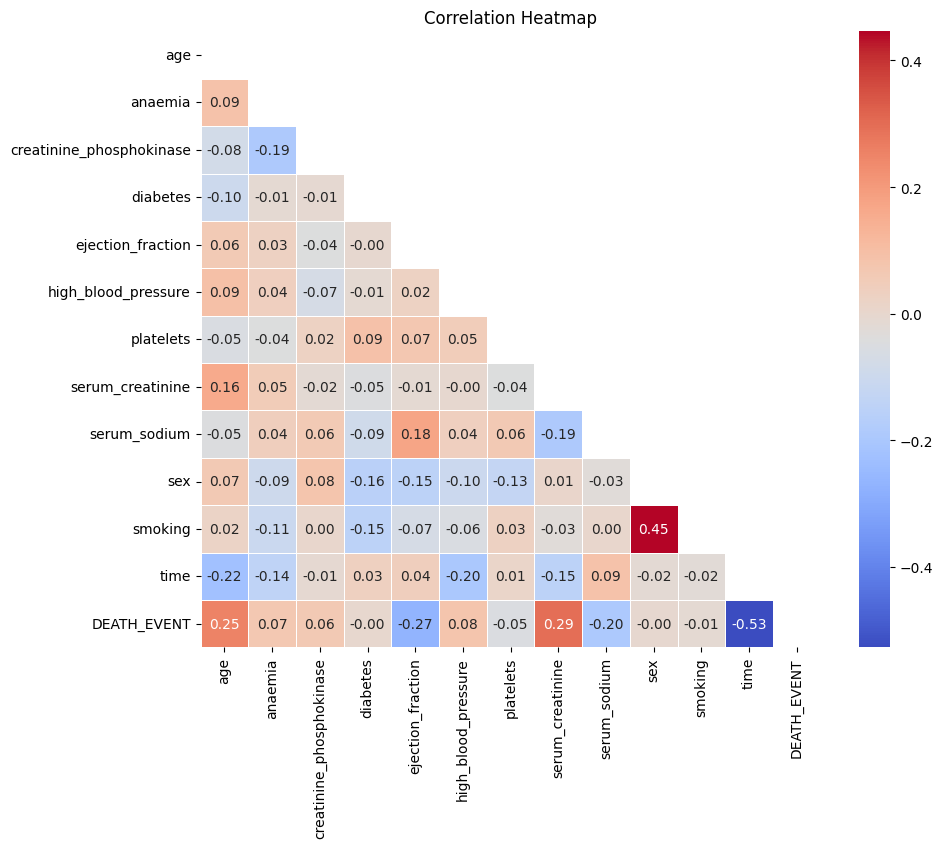

In [ ]:
# Create histogram using Seaborn
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Heatmap')

Attention to DEATH_EVENT attributes as the target with others in dataset.

In [ ]:
df_graph = df.copy()
df_graph

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


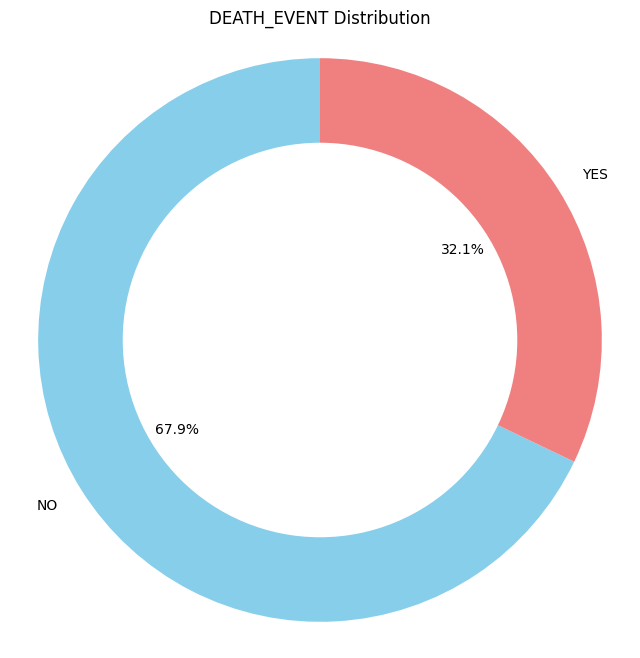

In [ ]:
# Mapping labels to custom values
label_map = {1: 'YES', 0: 'NO'}

# Map the 'DEATH_EVENT' column using the label_map dictionary
df_graph = df.copy()
df_graph['DEATH_EVENT_label'] = df_graph['DEATH_EVENT'].map(label_map)

# Count the occurrences of each DEATH_EVENT value
death_event_counts = df_graph['DEATH_EVENT_label'].value_counts()

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(death_event_counts, labels=death_event_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('DEATH_EVENT Distribution')

# Draw a white circle at the center to create the donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.show()

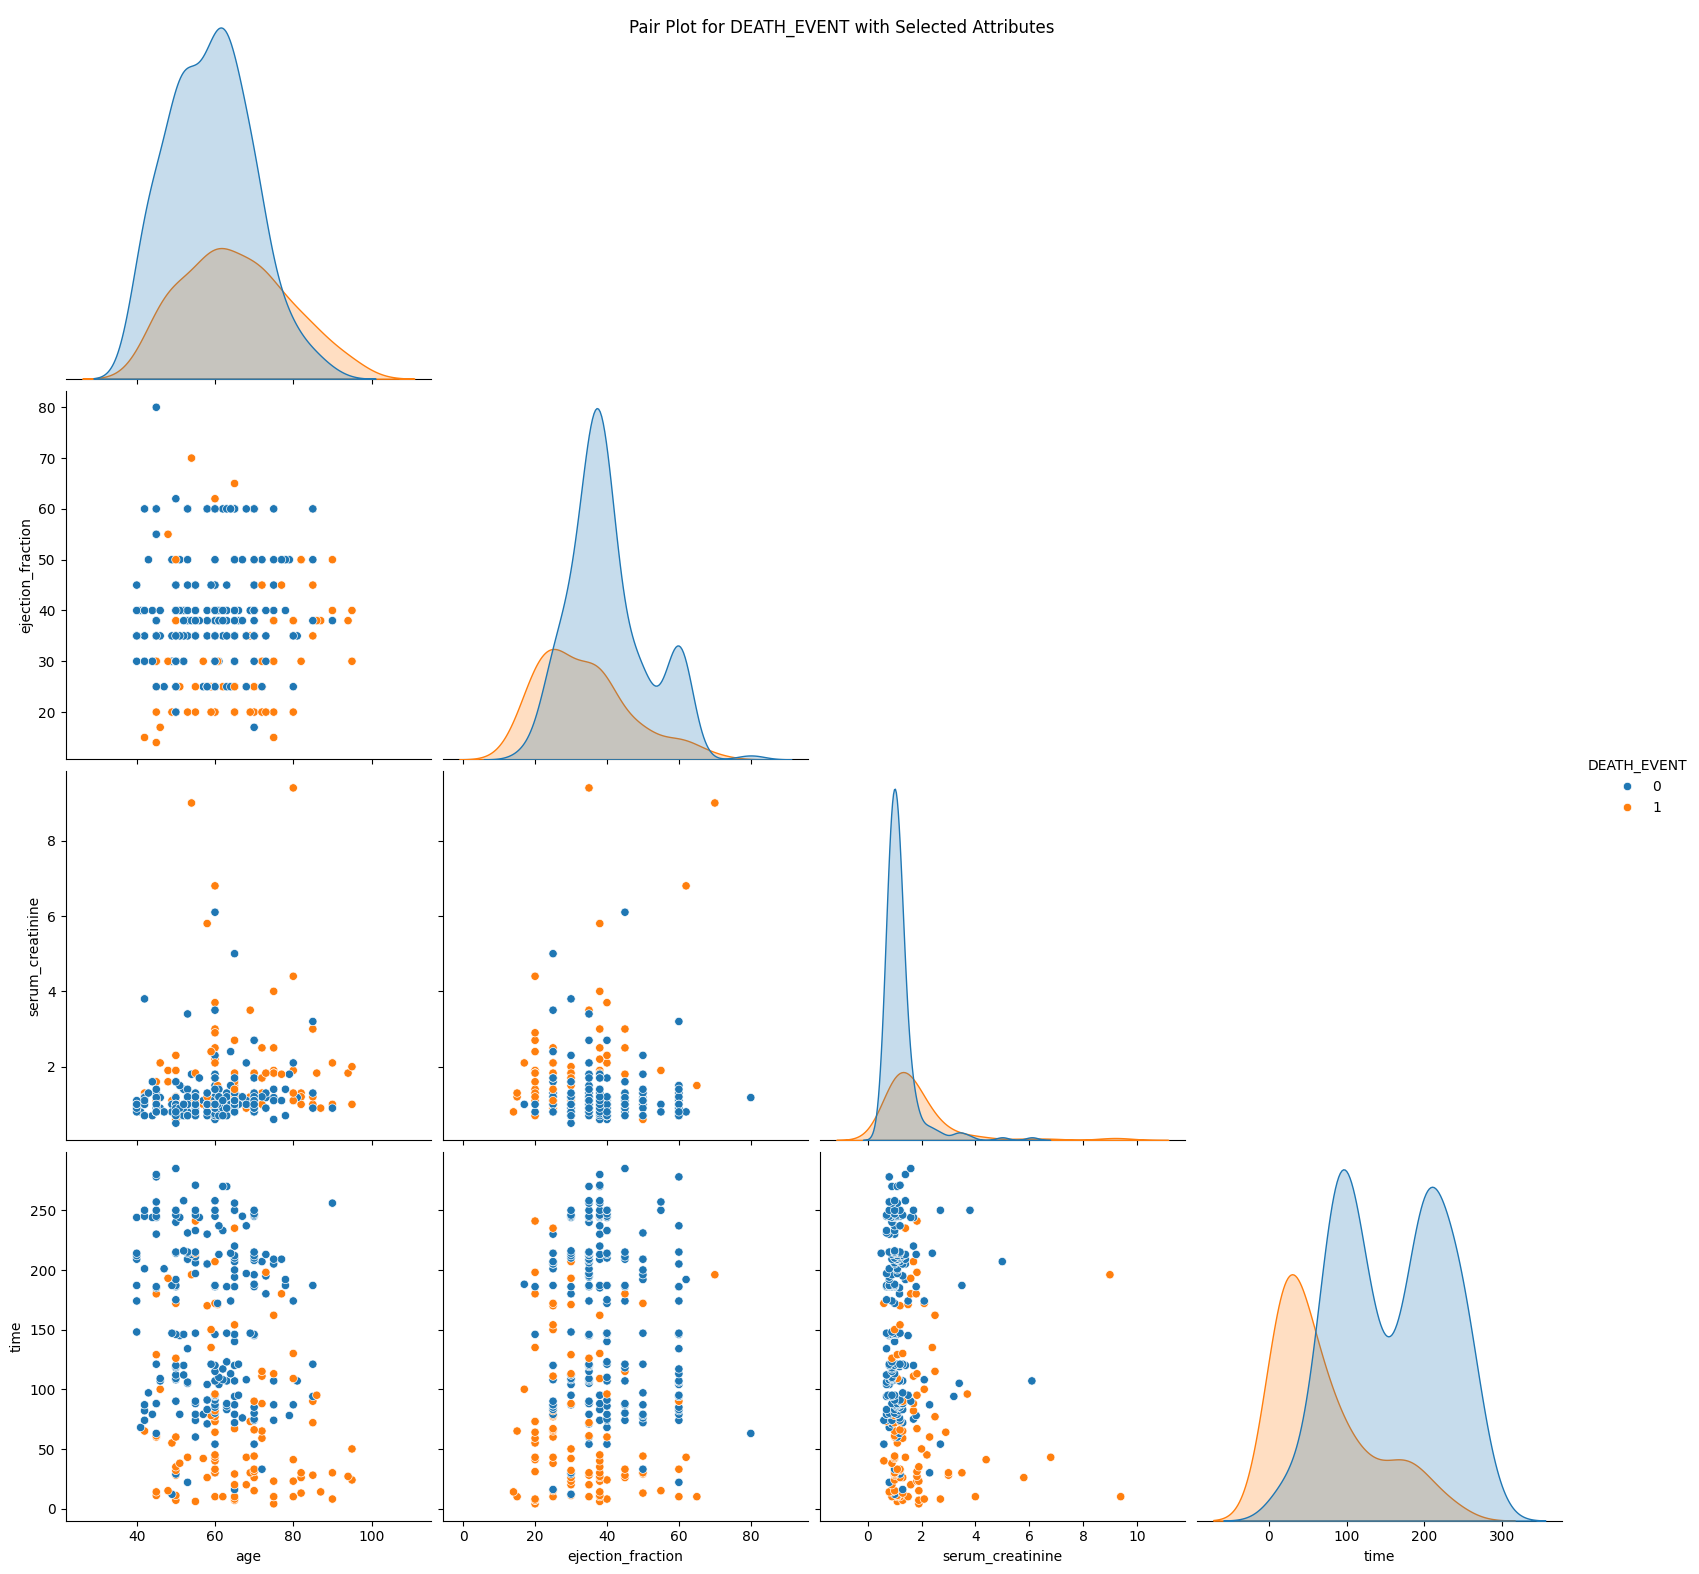

In [ ]:
# Specify the attributes you want to include
attributes = ['age', 'ejection_fraction', 'serum_creatinine', 'time']

# Create pair plot with 'DEATH_EVENT' as hue
sns.pairplot(df, vars=attributes, hue='DEATH_EVENT', diag_kind='kde', height=4, aspect = 1, corner=True)
plt.suptitle('Pair Plot for DEATH_EVENT with Selected Attributes')
plt.show()


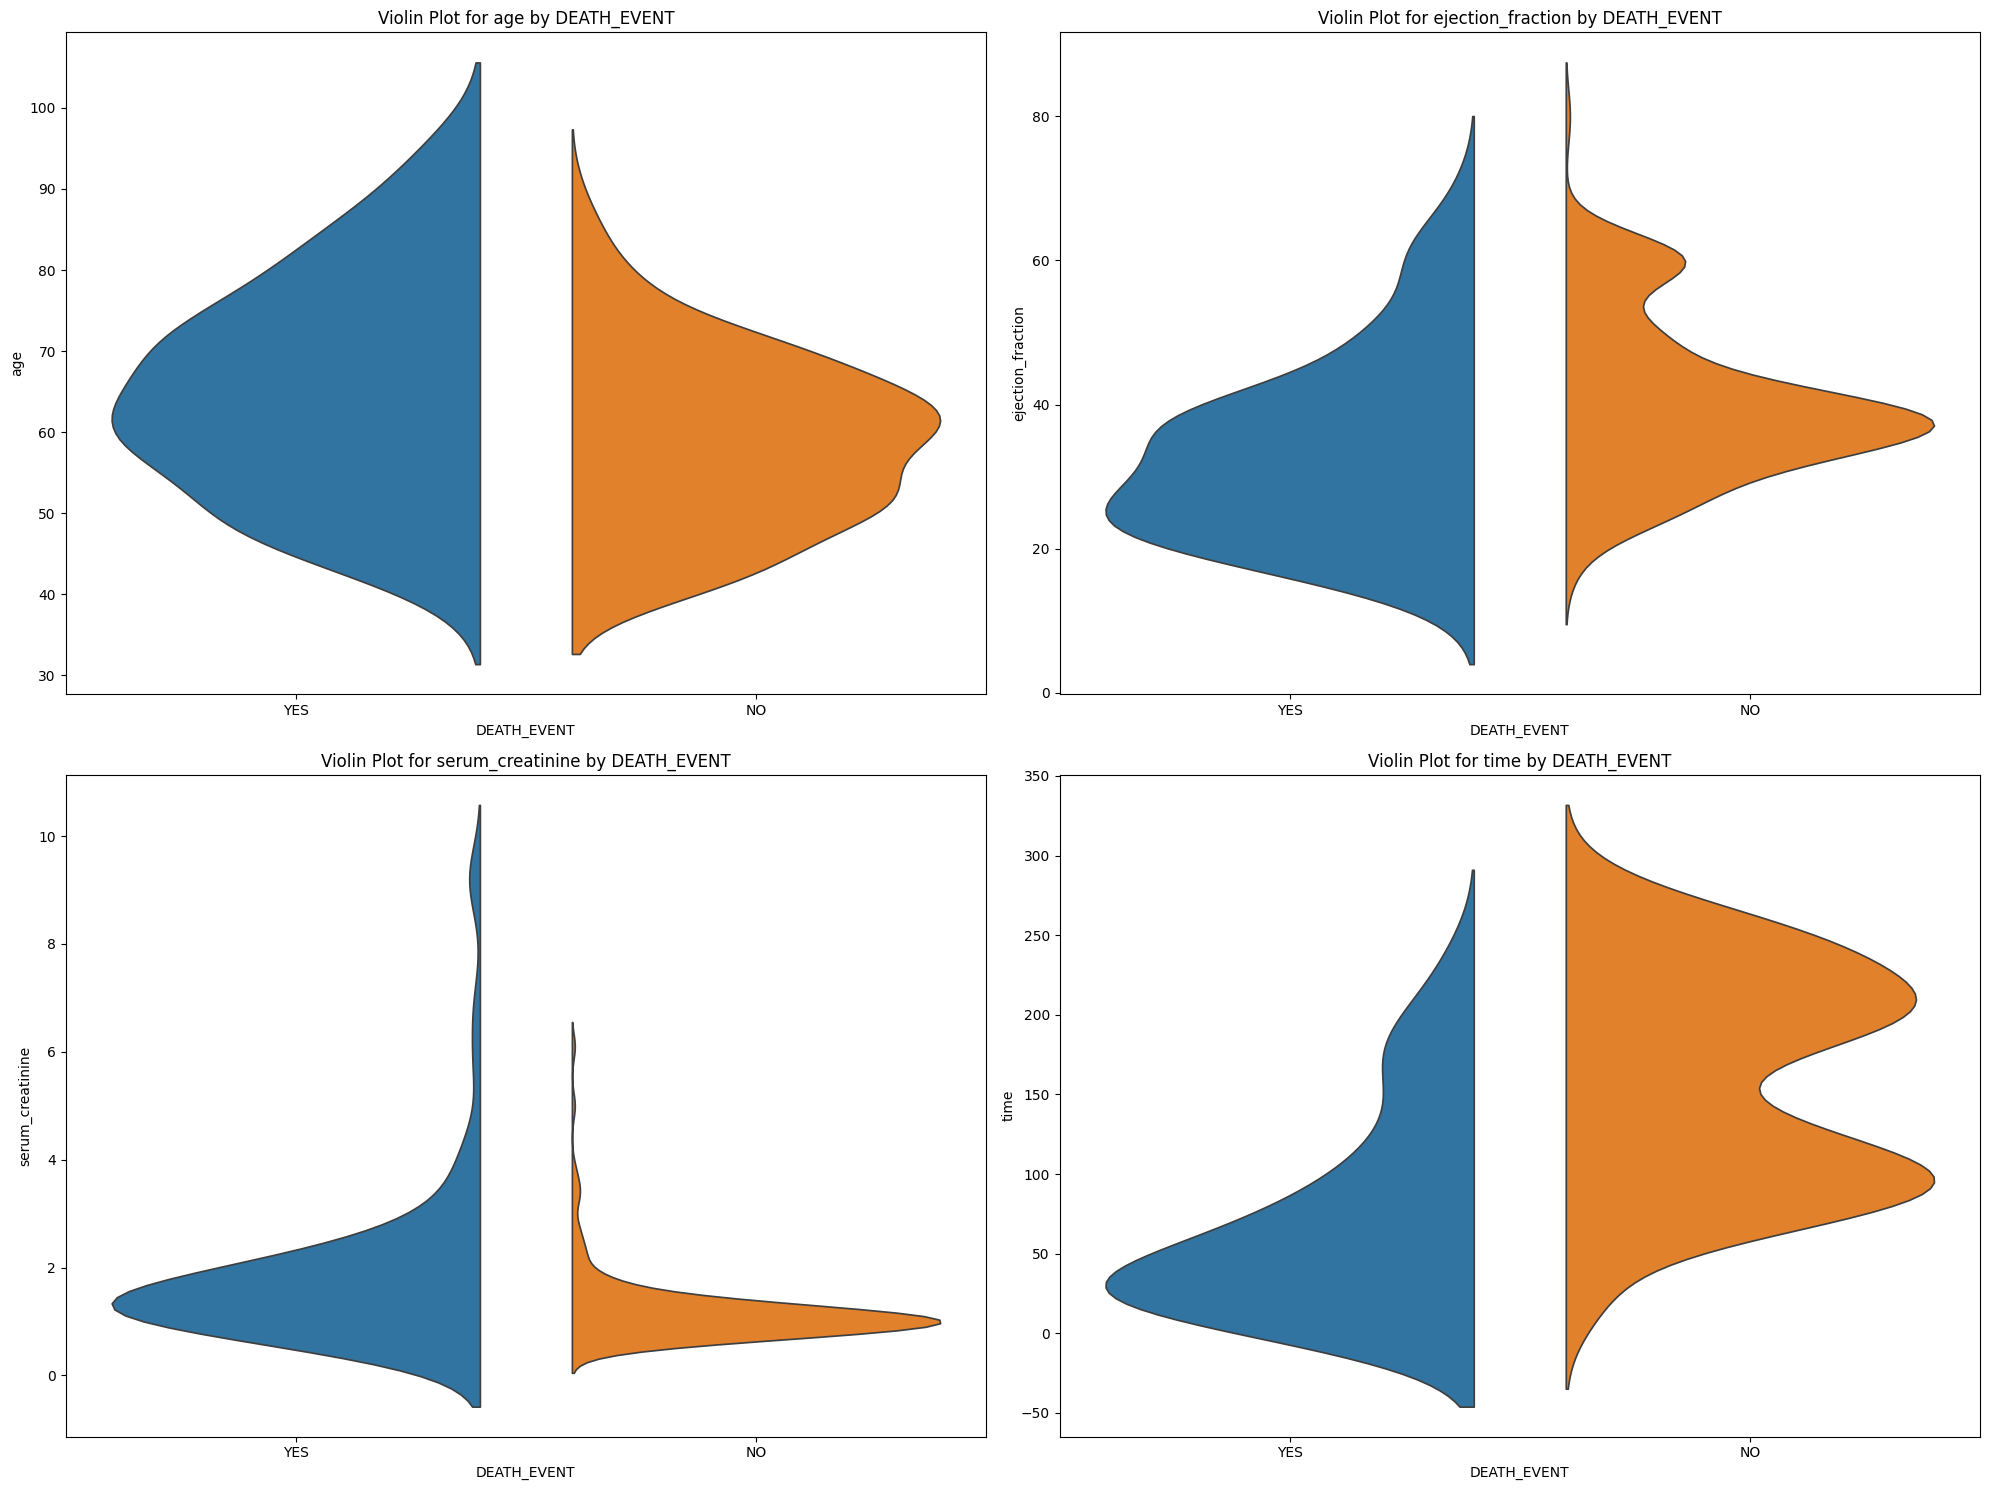

In [ ]:
# Specify the attributes you want to include
attributes = ['age', 'ejection_fraction', 'serum_creatinine', 'time']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create violin plots for each attribute
for i, attribute in enumerate(attributes):
    sns.violinplot(x='DEATH_EVENT_label', y=attribute, data=df_graph, ax=axes[i], hue='DEATH_EVENT_label', split=True, inner=None)
    axes[i].set_title(f'Violin Plot for {attribute} by DEATH_EVENT')+
    axes[i].set_xlabel('DEATH_EVENT')
    axes[i].set_ylabel(attribute)

plt.tight_layout()
plt.show()

## **Result**  

* There are 299 non-null values in all the attributes thus no missing values.

* No duplicated rows.
  
* There are many outliers existed in the dataset, such as: 'creatinine_phosphokinase', 'ejection_fraction', 'platalet', 'serum_creatinine' and 'serum_sodium'.

* Datatype is also either 'float64' or 'int64', all works well except age, whose datatype 'float64' is not suitable for that attribute.

## **Solution**

### **Handling inappropriated datatype**

Using `.astype()` method provided by Pandas to convert the 'age' attribute's datatype to an `int64`. This ensures consistency and allows for proper numerical analysis.

In [ ]:
df['age'] = df['age'].apply(np.ceil)
df['age'] = df['age'].astype('int64')
df.info()
df.head()
df.to_csv('out.csv') # export to check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 30.5 KB


### **Scaling Data**


Dataset contains many outliers, so we decide to use Robust Scaler to scale data.

In [ ]:
# Columns to scale
columns_to_scale = ['age', 'creatinine_phosphokinase', 'ejection_fraction',
                    'platelets', 'serum_creatinine', 'serum_sodium', 'time']

# Select the columns to be scaled
df_to_scale = df[columns_to_scale]

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit the scaler to the selected data and transform it
scaled_data = scaler.fit_transform(df_to_scale)

# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=columns_to_scale)

# Combine the scaled data with the rest of the DataFrame
df_scaled = pd.concat([df_scaled, df.drop(columns=columns_to_scale)], axis=1)
df = df_scaled
df

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,0.789474,0.713212,-1.200000,0.032967,1.6,-1.166667,-0.853846,0,0,1,1,0,1
1,-0.263158,16.350161,0.000000,0.014923,0.0,-0.166667,-0.838462,0,0,0,1,0,1
2,0.263158,-0.223416,-1.200000,-1.098901,0.4,-1.333333,-0.830769,0,0,0,1,1,1
3,-0.526316,-0.298604,-1.200000,-0.571429,1.6,0.000000,-0.830769,1,0,0,1,0,1
4,0.263158,-0.193340,-1.200000,0.714286,3.2,-3.500000,-0.823077,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.105263,-0.406015,0.000000,-1.175824,0.0,1.000000,1.192308,0,1,1,1,1,0
295,-0.263158,3.372718,0.000000,0.087912,0.2,0.333333,1.200000,0,0,0,0,0,0
296,-0.789474,3.888292,1.466667,5.274725,-0.6,0.166667,1.253846,0,1,0,0,0,0
297,-0.789474,4.646617,0.000000,-1.340659,0.6,0.500000,1.269231,0,0,0,1,1,0


# **Models Implementation** (HAI NGOC - ITDSIU21057) & (DINH AN - ITDSIU20113)

In [ ]:
X = df.drop(['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

## Naïve Bayes

####Using all attributes

In [ ]:
model = GaussianNB()

In [ ]:
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_test

281    0
265    0
164    1
9      1
77     0
278    0
93     1
109    0
5      1
173    0
97     0
195    1
184    1
154    0
57     0
60     1
147    0
108    0
63     1
140    1
155    0
104    0
247    0
46     1
42     1
275    0
280    0
116    0
213    1
236    0
17     1
239    0
33     0
24     1
45     1
7      1
113    1
194    1
111    0
92     0
75     1
82     1
118    0
76     0
129    0
197    0
210    0
288    0
219    0
178    0
144    1
186    1
84     1
248    0
277    0
73     0
244    0
25     1
209    0
59     1
Name: DEATH_EVENT, dtype: int64

In [ ]:
model.predict(X_test)

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
accuracy_score(y_test, model.predict(X_test))

0.7

####Using 4 attributes only



In [ ]:
#feature_df=df1[['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time']]
feature_df=df[['age', 'ejection_fraction', 'serum_creatinine', 'time']]
X1=np.asarray(feature_df)
Y1=y1=np.asarray(df['DEATH_EVENT'])

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=2)

In [ ]:
model = GaussianNB()

In [ ]:
model.fit(X_train1, y_train1)

GaussianNB()

In [ ]:
model.predict(X_test1)

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0])

In [ ]:
accuracy_score(y_test1, model.predict(X_test1))

0.8333333333333334

####Evaluation

In [ ]:
y_pred = model.predict(X_test1)
y_pred_binary = np.round(y_pred).astype(int)

print('\nClassification Report:')
print(classification_report(y_test1, y_pred_binary))

cm1 = confusion_matrix(y_test1, y_pred_binary)
cm1 = cm1/np.sum(cm1)

print('\nROC AUC Score:')
roc_auc_score(y_test1, y_pred_binary)


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        43
           1       0.77      0.59      0.67        17

    accuracy                           0.83        60
   macro avg       0.81      0.76      0.78        60
weighted avg       0.83      0.83      0.83        60


ROC AUC Score:


0.759233926128591

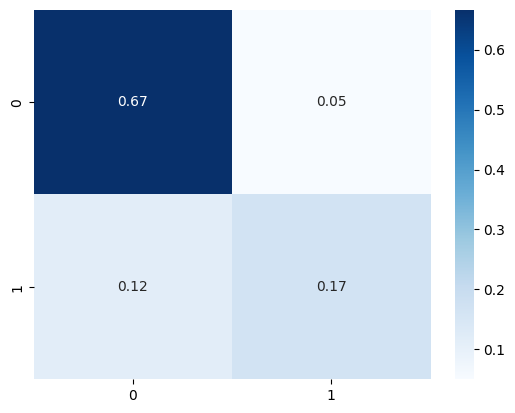

In [ ]:
sns.heatmap(cm1, annot=True, cmap='Blues')
plt.show()

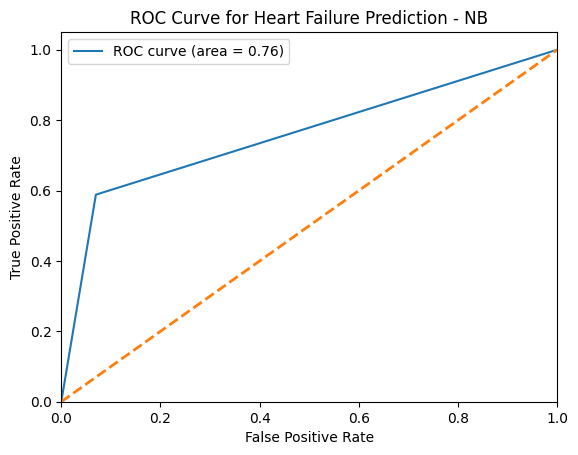

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_binary)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Failure Prediction - NB')
plt.legend()
plt.show()

## SVM

####Using all attributes

In [ ]:
svc=SVC() #Default hyperparameters
display(svc)

svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

SVC()

Accuracy Score:
0.6666666666666666


####Using 4 attributes only

In [ ]:
svc=SVC() #Default hyperparameters
display(svc)

svc.fit(X_train1,y_train1)

y_pred=svc.predict(X_test1)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test1,y_pred))

SVC()

Accuracy Score:
0.8666666666666667


####Evaluation

In [ ]:
y_pred = svc.predict(X_test1)
y_pred_binary = np.round(y_pred).astype(int)

print('\nClassification Report:')
print(classification_report(y_test1, y_pred_binary))

cm2 = confusion_matrix(y_test1, y_pred_binary)
cm2 = cm2/np.sum(cm2)

print('\nROC AUC Score:')
roc_auc_score(y_test1, y_pred_binary)


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        43
           1       0.80      0.71      0.75        17

    accuracy                           0.87        60
   macro avg       0.84      0.82      0.83        60
weighted avg       0.86      0.87      0.86        60


ROC AUC Score:


0.8180574555403557

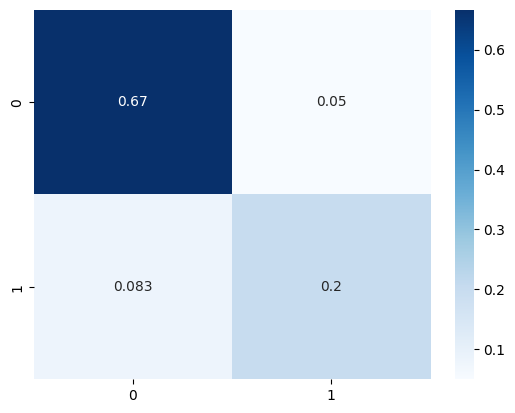

In [ ]:
sns.heatmap(cm2, annot=True, cmap='Blues')
plt.show()

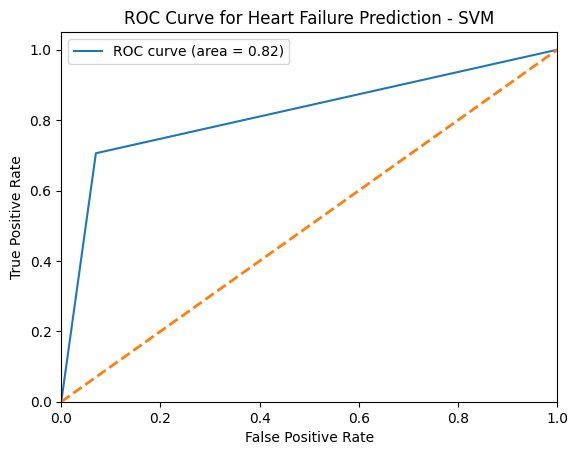

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_binary)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Failure Prediction - SVM')
plt.legend()
plt.show()

## ANN

#### Using all attributes

In [ ]:
model = Sequential()
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim=12))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
early_stop = EarlyStopping(min_delta=0.001, patience=20, restore_best_weights=True)
history = model.fit(X_train, y_train, batch_size = 25, epochs = 500,callbacks=[early_stop], validation_data=(X_val, y_val))

Epoch 1/500
8/8 [==============================] - 2s 35ms/step - loss: 0.6926 - accuracy: 0.6760 - val_loss: 0.6904 - val_accuracy: 0.8167
Epoch 2/500
8/8 [==============================] - 0s 12ms/step - loss: 0.6913 - accuracy: 0.6648 - val_loss: 0.6877 - val_accuracy: 0.8167
Epoch 3/500
8/8 [==============================] - 0s 8ms/step - loss: 0.6898 - accuracy: 0.6648 - val_loss: 0.6848 - val_accuracy: 0.8167
Epoch 4/500
8/8 [==============================] - 0s 10ms/step - loss: 0.6882 - accuracy: 0.6648 - val_loss: 0.6814 - val_accuracy: 0.8167
Epoch 5/500
8/8 [==============================] - 0s 8ms/step - loss: 0.6864 - accuracy: 0.6648 - val_loss: 0.6776 - val_accuracy: 0.8167
Epoch 6/500
8/8 [==============================] - 0s 10ms/step - loss: 0.6837 - accuracy: 0.6648 - val_loss: 0.6726 - val_accuracy: 0.8167
Epoch 7/500
8/8 [==============================] - 0s 11ms/step - loss: 0.6812 - accuracy: 0.6648 - val_loss: 0.6659 - val_accuracy: 0.8167
Epoch 8/500
8/8 [=====

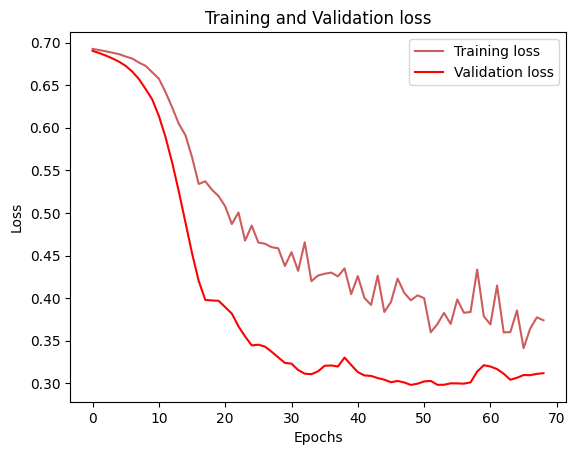

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

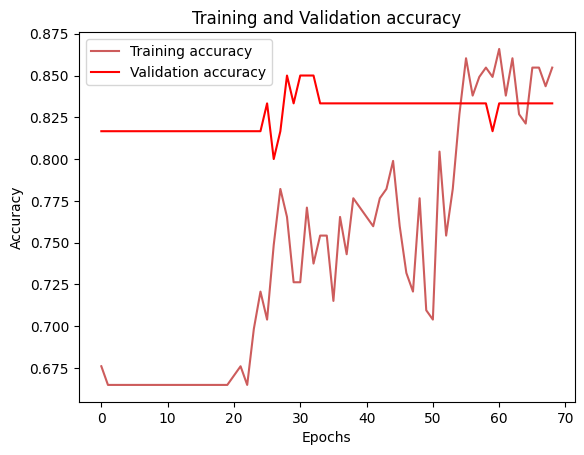

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred).astype(int)

accuracy_score(y_test, y_pred_binary)

2/2 [==============================] - 0s 9ms/step


0.7166666666666667

#### Use 4 attributes only

In [ ]:
X_train = X_train[['age', 'ejection_fraction', 'serum_creatinine', 'time']]
X_val = X_val[['age', 'ejection_fraction', 'serum_creatinine', 'time']]
X_test = X_test[['age', 'ejection_fraction', 'serum_creatinine', 'time']]

In [ ]:
model = Sequential()
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim=4))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size = 25, epochs = 500,callbacks=[early_stop], validation_data=(X_val, y_val))

Epoch 1/500
8/8 [==============================] - 3s 61ms/step - loss: 0.6926 - accuracy: 0.6480 - val_loss: 0.6906 - val_accuracy: 0.8167
Epoch 2/500
8/8 [==============================] - 0s 16ms/step - loss: 0.6913 - accuracy: 0.6648 - val_loss: 0.6881 - val_accuracy: 0.8167
Epoch 3/500
8/8 [==============================] - 0s 17ms/step - loss: 0.6900 - accuracy: 0.6648 - val_loss: 0.6854 - val_accuracy: 0.8167
Epoch 4/500
8/8 [==============================] - 0s 28ms/step - loss: 0.6887 - accuracy: 0.6648 - val_loss: 0.6827 - val_accuracy: 0.8167
Epoch 5/500
8/8 [==============================] - 0s 16ms/step - loss: 0.6872 - accuracy: 0.6648 - val_loss: 0.6799 - val_accuracy: 0.8167
Epoch 6/500
8/8 [==============================] - 0s 17ms/step - loss: 0.6856 - accuracy: 0.6648 - val_loss: 0.6770 - val_accuracy: 0.8167
Epoch 7/500
8/8 [==============================] - 0s 14ms/step - loss: 0.6840 - accuracy: 0.6648 - val_loss: 0.6734 - val_accuracy: 0.8167
Epoch 8/500
8/8 [===

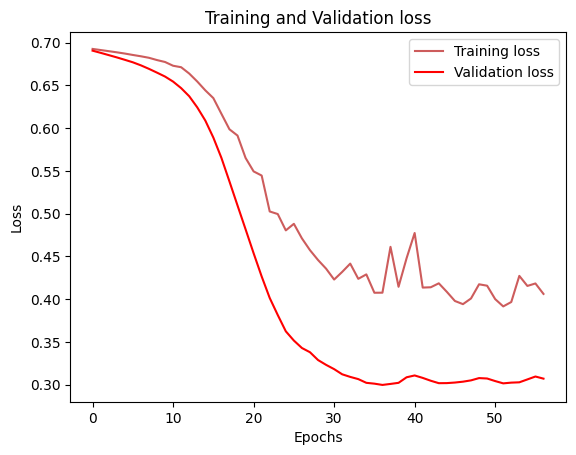

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

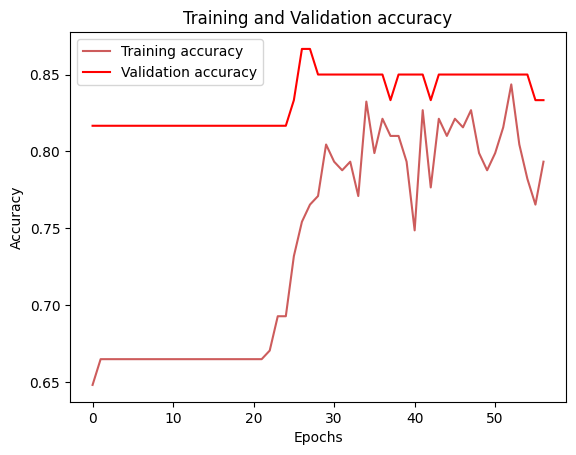

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred).astype(int)

print('\nClassification Report:')
print(classification_report(y_test, y_pred_binary))

print('\nROC AUC Score:')
roc_auc_score(y_test, y_pred_binary)

2/2 [==============================] - 0s 5ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.83      0.78        35
           1       0.71      0.60      0.65        25

    accuracy                           0.73        60
   macro avg       0.73      0.71      0.72        60
weighted avg       0.73      0.73      0.73        60


ROC AUC Score:


0.7142857142857142

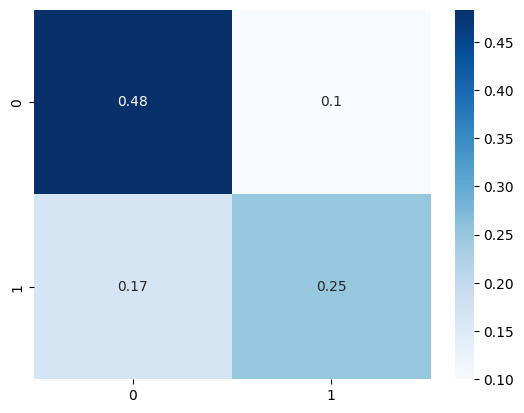

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_binary)

sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, cmap='Blues')
plt.show()

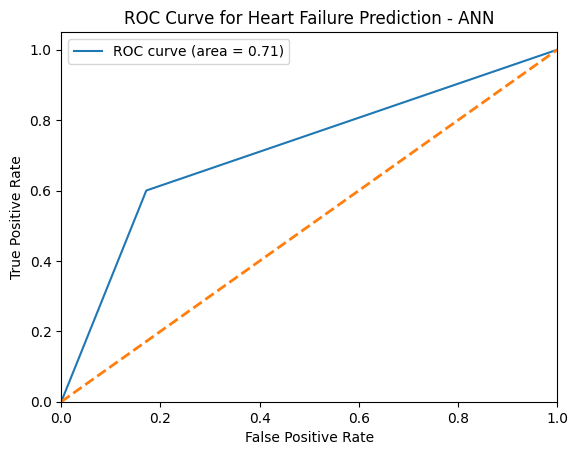

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Failure Prediction - ANN')
plt.legend()
plt.show()